In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv('/content/sample_data/pima-indians_classification_train.csv')
column_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
train_df.columns = column_names
print(train_df.head())

 #Separate features and target
X = train_df.drop('class', axis=1)
y = train_df['class']
print(X.head())
print(y.head())

   preg  plas  pres  skin  test  mass   pedi  age  class
0     1    85    66    29     0  26.6  0.351   31      0
1     8   183    64     0     0  23.3  0.672   32      1
2     1    89    66    23    94  28.1  0.167   21      0
3     0   137    40    35   168  43.1  2.288   33      1
4     5   116    74     0     0  25.6  0.201   30      0
   preg  plas  pres  skin  test  mass   pedi  age
0     1    85    66    29     0  26.6  0.351   31
1     8   183    64     0     0  23.3  0.672   32
2     1    89    66    23    94  28.1  0.167   21
3     0   137    40    35   168  43.1  2.288   33
4     5   116    74     0     0  25.6  0.201   30
0    0
1    1
2    0
3    1
4    0
Name: class, dtype: int64


In [4]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=9,weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn, X_scaled, y, cv=kf, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)



[[-0.84372629 -1.12208597 -0.16024856 ... -0.68372895 -0.36426474
  -0.18894038]
 [ 1.23423997  1.94447577 -0.26357823 ... -1.10230105  0.60470064
  -0.1037951 ]
 [-0.84372629 -0.99692019 -0.16024856 ... -0.49346891 -0.91968415
  -1.0403932 ]
 ...
 [ 0.343683    0.0044061   0.14974046 ... -0.73446496 -0.68423462
  -0.27408566]
 [-0.84372629  0.16086333 -0.47023757 ... -0.23978884 -0.37030191
   1.17338414]
 [-0.84372629 -0.8717544   0.04641078 ... -0.20173684 -0.47293375
  -0.87010264]]
Cross-validation scores: [0.75324675 0.72727273 0.80392157 0.7254902  0.75816993]
Mean CV accuracy: 0.7536 (+/- 0.0568)


Test set accuracy: 0.7316
Precision: 0.6552
Recall: 0.4750
[[131  20]
 [ 42  38]]


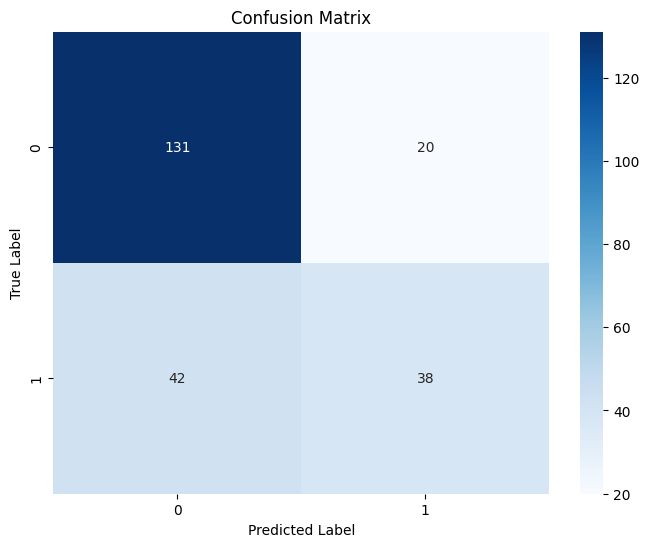

In [5]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.4f}")


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()




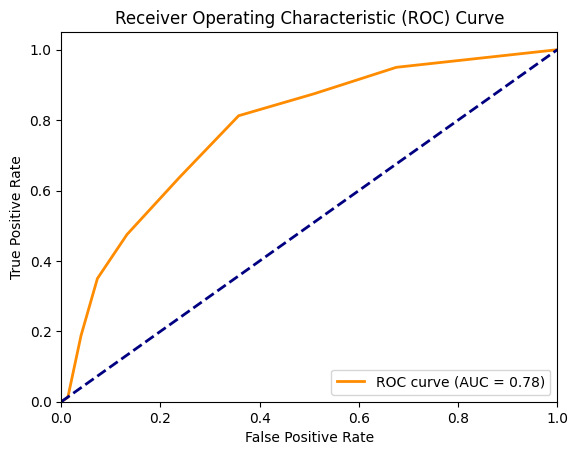

In [6]:
# Calculate ROC curve and AUC
y_pred_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()